In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('titanic_toy.csv')

In [6]:
df.sample(5)

,Age,Fare,Family,Survived
802,11.0,120.00,3,1
300,NaN,7.75,0,1
443,28.0,13.00,0,1
428,NaN,7.75,0,0
887,19.0,30.00,0,1


In [7]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [9]:
X = df.drop(columns = ['Survived'])
y = df['Survived']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [15]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [16]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 wala imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', X_train['Age_minus1'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 wala imputation: ', X_train['Fare_999'].var())
print('Fare Variance after -1 wala imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  210.2517072477438
Age Variance after 99 wala imputation:  932.9665366701436
Age Variance after -1 wala imputation:  315.99550362600644
Original Fare variable variance:  2675.2394049177087
Fare Variance after 999 wala imputation:  2675.2394049177087
Fare Variance after -1 wala imputation:  2675.2394049177087


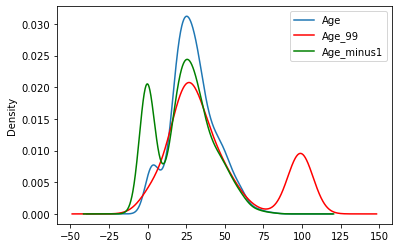

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax = ax)
# variable imputed with the median 
X_train['Age_99'].plot(kind = 'kde', ax = ax, color = 'red')
# variable imputed with the mean 
X_train['Age_minus1'].plot(kind ='kde', ax = ax ,color = 'green')

# add legend 
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc= 'best')

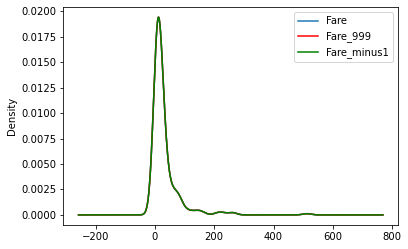

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [27]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1,Fare_999
Age,210.251707,69.137162,-6.993325,210.251707,210.251707,69.137162,69.137162,69.137162
Fare,69.137162,2675.239405,17.684447,-101.137070,124.270305,2675.239405,2675.239405,2675.239405
Family,-6.993325,17.684447,2.830892,-6.941982,-5.034556,17.684447,17.684447,17.684447
Age_99,210.251707,-101.137070,-6.941982,932.966537,-166.460682,-101.137070,-101.137070,-101.137070
Age_minus1,210.251707,124.270305,-5.034556,-166.460682,315.995504,124.270305,124.270305,124.270305
Fare_99,69.137162,2675.239405,17.684447,-101.137070,124.270305,2675.239405,2675.239405,2675.239405
Fare_minus1,69.137162,2675.239405,17.684447,-101.137070,124.270305,2675.239405,2675.239405,2675.239405
Fare_999,69.137162,2675.239405,17.684447,-101.137070,124.270305,2675.239405,2675.239405,2675.239405


In [29]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1,Fare_999
Age,1.000000,0.085422,-0.319651,1.000000,1.000000,0.085422,0.085422,0.085422
Fare,0.085422,1.000000,0.203212,-0.064017,0.135159,1.000000,1.000000,1.000000
Family,-0.319651,0.203212,1.000000,-0.135079,-0.168329,0.203212,0.203212,0.203212
Age_99,1.000000,-0.064017,-0.135079,1.000000,-0.306576,-0.064017,-0.064017,-0.064017
Age_minus1,1.000000,0.135159,-0.168329,-0.306576,1.000000,0.135159,0.135159,0.135159
Fare_99,0.085422,1.000000,0.203212,-0.064017,0.135159,1.000000,1.000000,1.000000
Fare_minus1,0.085422,1.000000,0.203212,-0.064017,0.135159,1.000000,1.000000,1.000000
Fare_999,0.085422,1.000000,0.203212,-0.064017,0.135159,1.000000,1.000000,1.000000


Using Sklearn

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 2)

In [31]:
imputer1 = SimpleImputer(strategy = 'constant',fill_value = 99)
imputer2 = SimpleImputer(strategy = 'constant',fill_value = 999)

In [33]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder = 'passthrough')

In [34]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [36]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [37]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [42]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

ValueError: Specifying the columns using strings is only supported for dataframes.

In [43]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])